In [1]:
import utils_runner_universal

os              : Linux-5.13.0-52-generic-x86_64-with-glibc2.10
python          : 3.8.16
tsai            : 0.3.6
fastai          : 2.7.12
fastcore        : 1.5.29
torch           : 2.0.0+cu117
device          : 2 gpus (['Tesla K80', 'Tesla K80'])
cpu cores       : 24
threads per cpu : 2
RAM             : 1007.78 GB
GPU memory      : [11.17, 11.17] GB
os              : Linux-5.13.0-52-generic-x86_64-with-glibc2.10
python          : 3.8.16
tsai            : 0.3.6
fastai          : 2.7.12
fastcore        : 1.5.29
torch           : 2.0.0+cu117
device          : 2 gpus (['Tesla K80', 'Tesla K80'])
cpu cores       : 24
threads per cpu : 2
RAM             : 1007.78 GB
GPU memory      : [11.17, 11.17] GB
os              : Linux-5.13.0-52-generic-x86_64-with-glibc2.10
python          : 3.8.16
tsai            : 0.3.6
fastai          : 2.7.12
fastcore        : 1.5.29
torch           : 2.0.0+cu117
device          : 2 gpus (['Tesla K80', 'Tesla K80'])
cpu cores       : 24
threads per cpu : 2
RAM   

In [2]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

In [3]:
dimension=5
sample_count_dimension_factor=50
instances_to_use=999

In [4]:

x_columns=[f'x_{i}' for i in range (0,dimension)]
y_columns = ['y']



def read_sample_df(dimension, sample_count_dimension_factor):
    file_to_read = open(f"data/lhs_samples_dimension_{dimension}_{sample_count_dimension_factor}_samples.p", "rb")
    loaded_dictionary = pickle.load(file_to_read)
    all_sample_df=pd.DataFrame.from_dict(loaded_dictionary,orient='index')
    all_sample_df.columns=x_columns+y_columns
    all_sample_df.index=pd.MultiIndex.from_tuples(all_sample_df.index, names=['problem_id', 'instance_id','dimension','sample_id'])
    return all_sample_df

def scale_y(all_sample_df):
    new_sample_df=pd.DataFrame()
    for problem_id in all_sample_df.reset_index()['problem_id'].drop_duplicates():
        problem_instances=all_sample_df.loc[problem_id]
        for instance_id in all_sample_df.reset_index()['instance_id'].drop_duplicates():

            instance_df=problem_instances.loc[instance_id].copy()
            min_max_scaler = MinMaxScaler()

            y_scaled = min_max_scaler.fit_transform(instance_df['y'].values.reshape(-1, 1))
            instance_df.loc[:,'y']=y_scaled
            instance_df['problem_id']=problem_id
            instance_df['instance_id']=instance_id
            new_sample_df=pd.concat([new_sample_df,instance_df])
            
    new_sample_df=new_sample_df.reset_index(drop=True).set_index(['problem_id','instance_id'])
    return new_sample_df


In [5]:
scaled_file=f"data/scaled_lhs_samples_dimension_{dimension}_{sample_count_dimension_factor}_samples.csv"
if not os.path.isfile(scaled_file):
    print('recalculating scaled samples')
    all_sample_df=read_sample_df(dimension, sample_count_dimension_factor)
    all_sample_df=all_sample_df.query("instance_id<=@instances_to_use")
    new_sample_df=scale_y(all_sample_df)
    new_sample_df.to_csv(scaled_file)
else:
    print('reading scaled samples from file')
    new_sample_df=pd.read_csv(scaled_file, index_col=[0,1])

reading scaled samples from file


In [6]:
new_sample_df

x_0   x_1   x_2   x_3   x_4         y
problem_id instance_id                                        
1          1            2.22  1.26  4.06  3.30  4.14  0.489883
           1           -4.46  0.34  3.26  4.78 -3.42  0.277551
           1            1.86  1.18 -0.42  0.02 -0.26  0.069288
           1           -3.42  3.06  4.02  0.70  3.14  0.544000
           1           -3.02 -3.46 -1.74 -2.58  2.30  0.364830
...                      ...   ...   ...   ...   ...       ...
24         999         -3.18 -1.78 -2.46 -0.06 -3.02  0.226218
           999          0.02  1.74  2.38  4.50 -4.62  0.484437
           999          2.46  1.70  0.66  1.58  1.06  0.051723
           999         -0.10  0.62 -1.42 -1.58 -2.42  0.150024
           999          2.02 -4.86 -0.30  2.66 -2.54  0.420506

[5994000 rows x 6 columns]

file_to_read = open("algorithm_run_data/bbob_lhs_dim_3.csv", "rb") 
loaded_dictionary = pickle.load(file_to_read) 
all_sample_df=pd.DataFrame.from_dict(loaded_dictionary,orient='index') 
all_sample_df.columns=x_columns+y_columns 
all_sample_df.index=pd.MultiIndex.from_tuples(all_sample_df.index, names=['problem_id', 'instance_id','dimension','sample_id'])

Number of samples: 250, Number of variables: 6, Number of classes: 24
OptTransStats(
  (W_P): Linear(in_features=6, out_features=30, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (encoder): TSTEncoder(
    (layers): ModuleList(
      (0): TSTEncoderLayer(
        (self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=30, out_features=30, bias=False)
          (W_K): Linear(in_features=30, out_features=30, bias=False)
          (W_V): Linear(in_features=30, out_features=30, bias=False)
          (W_O): Linear(in_features=30, out_features=30, bias=False)
        )
        (dropout_attn): Dropout(p=0.1, inplace=False)
        (batchnorm_attn): Sequential(
          (0): Transpose(1, 2)
          (1): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): Transpose(1, 2)
        )
        (ff): Sequential(
          (0): Linear(in_features=30, out_features=256, bias=True)
          (1): ReLU()
          (2): Dropout(p=0.1, inp

epoch,train_loss,valid_loss,accuracy,time
0,2.136474,1.929153,0.354630,00:50
1,1.707214,1.434456,0.506019,00:49
2,1.460725,1.162536,0.593056,00:46
3,1.159640,0.964336,0.647222,00:48
4,1.055856,0.856330,0.683796,00:46
5,1.042867,0.885893,0.659722,00:38
6,0.934108,0.718829,0.729167,00:36
7,0.871395,0.806729,0.675926,00:38
8,0.818005,0.663248,0.751389,00:39
9,0.797117,0.624198,0.763889,00:38


No improvement since epoch 10: early stopping

Elapsed time: 663.2544620037079
Evaluating model


                    1           2           3           4           5   
precision    0.886986    0.943991    0.791460    0.994286    0.986585  \
recall       0.960445    1.000000    0.985167    0.860321    1.000000   
f1-score     0.922255    0.971188    0.877753    0.922465    0.993247   
support    809.000000  809.000000  809.000000  809.000000  809.000000   

                    6           7           8           9          10  ...   
precision    0.560284    0.501984    0.961905    0.968641    0.469183  ...  \
recall       0.683560    0.625464    0.998764    0.343634    0.752781  ...   
f1-score     0.615813    0.556962    0.979988    0.507299    0.578073  ...   
support    809.000000  809.000000  809.000000  809.000000  809.000000  ...   

                   18          19          20          21          22   
precision    0.313531    0.596518    0.988998    0.998762    0.997534  \
recall       0.704574    0.974042    1.000000    0.997528    1.000000   
f1-score     0.433955   

                   1          2          3          4          5          6   
precision   0.877551   0.989011   0.782609   1.000000   0.989011   0.586538  \
recall      0.955556   1.000000   1.000000   0.911111   1.000000   0.677778   
f1-score    0.914894   0.994475   0.878049   0.953488   0.994475   0.628866   
support    90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   

                   7          8          9         10  ...         18   
precision   0.541667   0.946809   1.000000   0.464968  ...   0.285000  \
recall      0.577778   0.988889   0.344444   0.811111  ...   0.633333   
f1-score    0.559140   0.967391   0.512397   0.591093  ...   0.393103   
support    90.000000  90.000000  90.000000  90.000000  ...  90.000000   

                  19         20    21    22         23         24  accuracy   
precision   0.598639   0.978261   1.0   1.0   0.762712   0.810811  0.719907  \
recall      0.977778   1.000000   1.0   1.0   1.000000   1.000000  0.719907   
f

                    1           2           3           4           5   
precision    0.823529    0.925926    0.820513    0.988889    0.980392  \
recall       0.980000    1.000000    0.960000    0.890000    1.000000   
f1-score     0.894977    0.961538    0.884793    0.936842    0.990099   
support    100.000000  100.000000  100.000000  100.000000  100.000000   

                    6           7           8           9          10  ...   
precision    0.527559    0.511811    0.961538    1.000000    0.408163  ...  \
recall       0.670000    0.650000    1.000000    0.380000    0.600000  ...   
f1-score     0.590308    0.572687    0.980392    0.550725    0.485830  ...   
support    100.000000  100.000000  100.000000  100.000000  100.000000  ...   

                   18          19          20     21     22          23   
precision    0.308057    0.614907    0.980392    1.0    1.0    0.775194  \
recall       0.650000    0.990000    1.000000    1.0    1.0    1.000000   
f1-score     0.418

ValueError: not enough values to unpack (expected 6, got 5)

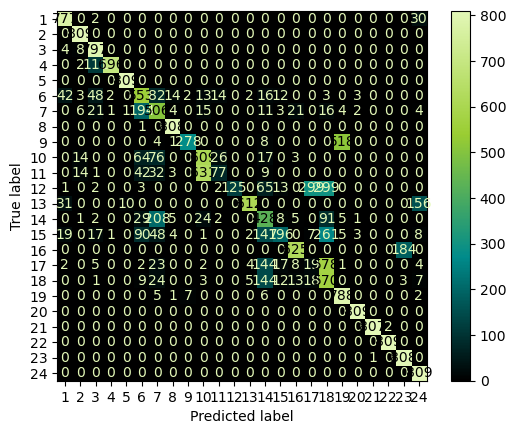

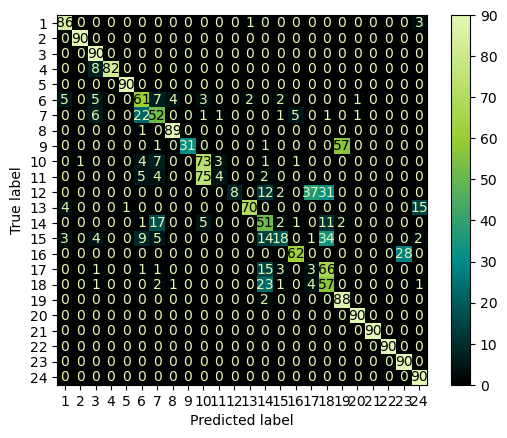

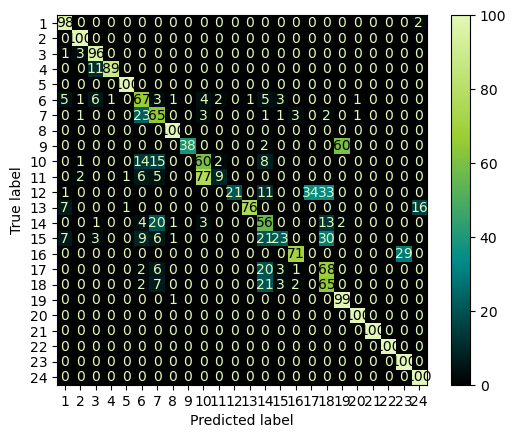

In [7]:
sample_df=new_sample_df.copy()
runner=utils_runner_universal.UniversalRunner(aggregations=['mean'],extra_info=f'xdim_{dimension}_instances_{instances_to_use}_samples_{sample_count_dimension_factor}', model_name='stats',fold=0,use_positional_encoding=False,task_name='problem_classification', verbose=True, plot_training=False, d_model=30, d_k=None, d_v=None, n_heads=1, n_layers=1, n_epochs=200, normalize=False, reduce=False, lr_max=0.001)
model, learner, test_report, test_confusion_matrix, embedding_df=runner.run(sample_df)

In [ ]:
unseen_problem=new_sample_df.query("problem_id==9")

In [ ]:
xx=unseen_problem.values

In [ ]:
from tsai_gina import *
from tsai.all import *

In [ ]:
yy=np.array([9 for i in range(0, unseen_problem.shape[0])])

In [ ]:
from utils_problem_classification_processor import *
processor=ProblemClassificationProcessor()

In [ ]:
xx,yy=processor.get_x_y(sample_df)

In [ ]:
dataset=TSDatasets(np.swapaxes(xx,1,2),yy)

In [ ]:
dls=TSDataLoaders.from_dsets(dataset)

In [ ]:
probas, targets, preds = learner.get_X_preds(np.swapaxes(xx,1,2), with_decoded=True)
predicted_classes = [int(p.argmax()) for p in probas]


In [ ]:
runner.plot_embeddings(dls[0], 50, problem_index_to_id )

In [ ]:
from tsai_gina import *
from tsai.all import *
x_train, y_train, x_val, y_val, x_test, y_test, problem_id_to_index, problem_index_to_id = runner.preprocess(sample_df)

dset_train, dset_val, dset_test = [TSDatasets(np.swapaxes(xx,1,2),yy) for xx,yy in [(x_train,y_train),(x_val,y_val),(x_test,y_test)]]

dls = TSDataLoaders.from_dsets(dset_train, dset_val, bs=50)
dls.c=len(set(y_train))
print(f'Number of samples: {dls.len}, Number of variables: {dls.vars}, Number of classes: {dls.c}')
#self.init_model(self.model_name,dls)
#self.plot_embeddings(dls, 50, problem_index_to_id )
#self.train_model(dls)
#self.evaluate(x_train,y_train,'train', problem_index_to_id )
#self.evaluate(x_val,y_val,'val', problem_index_to_id )
#test_report, test_confusion_matrix = self.evaluate(x_test,y_test,'test', problem_index_to_id )

runner.plot_embeddings(dls, 50, problem_index_to_id )

In [ ]:
model.cuda().get_embeddings(dls.cuda())